## Project Name - Zomato Restaurant Clustering and Sentiment Analysis


## Project Type - UnSupervised Machine Learning








# **GitHub Link -**https://github.com/susantkumarsahoo?tab=repositories

# Problem Statement

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.



India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.




The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.



This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis





Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.







## Attribute Information

## Zomato Restaurant names and Metadata

Use this dataset for clustering part



* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings





## Zomato Restaurant reviews

Merge this dataset with Names and Matadata and then use for sentiment analysis part

* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review

## Business Problem Analysis

Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. With every state, you can find something different to love. Besides traditional North Indian and South Indian food, the food culture is heavily inspired by and evolved around various civilizations. To say that Indians are food lovers would be an understatement. The restaurant business in India has been booming and people even like to celebrate small occasions of their lives with good food and great ambiance. The number of restaurant are increasing day by day. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

In this notebook I will try analyzing the Buisness Problem of Zomato and create a practical recommendation system for users.

The problem statement here has two datasets for us to work on:

* Zomato Restaurant Names and Metadata

* Zomato Restaurant Reviews

To assure Zomato's success it is important for the company to analyze its datasets and make appropriate strategic decisions. The problem statement here asks us to cluster the restaurants to help customers find the best restaurants in their city and according to their taste and understand the fields they are lagging in. This will help Zomato in building a good recommendation system for their customers. Do a cost-benefit analysis using the cuisines and costs of the restaurants. In order to understand fields that need to be worked upon, it is important to do sentiment analysis to get an idea about how people really feel about a particular restaurant. To identify the industry critics and especially work on their reviews to build a reputation worth praising.

# ***1. Know Your Data***

### **Import Libraries**

In [1]:
# Importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Lode dataset
meta_df = pd.read_csv('/content/drive/MyDrive/EDA Analysis/impy 3.0/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/EDA Analysis/impy 3.0/Zomato Restaurant reviews.csv')

In [4]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [6]:
meta_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [7]:
meta_df.shape

(105, 6)

In [8]:
review_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [9]:
review_df.shape

(10000, 7)

In [10]:
meta_df.describe().T


,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [11]:
review_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pictures,10000.0,0.7486,2.570381,0.0,0.0,0.0,0.0,64.0


## **Data Cleaning**

In [12]:
# Checking for null values in meta_df
meta_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Dropping null values in collections means we will be losing half of the observations, so we won't be removing null values. Instead we can remove the column 'collection' as we won't make any significant impact in our analysis.

Timings have one null value which could be dropped.

In [13]:
# Dropping collections and null value from Timings

meta_df.drop(['Collections'], axis= 1, inplace= True)
meta_df.dropna(inplace = True)
meta_df.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [14]:
# Checking for null values in review_df

review_df.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [15]:
# Dropping null values in reviews_df

review_df.dropna(axis = 0, inplace= True)

In [16]:
# Checking again

review_df.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [17]:
review_df.shape


(9955, 7)

So, not much data is lost.



In [18]:
# Checking for duplicate values in meta_df

meta_df[meta_df.duplicated()]

,Name,Links,Cost,Cuisines,Timings


In [19]:
# Dropping all duplicated values

review_df.drop_duplicates(inplace= True)

In [20]:
# Checking for duplicate values in review_df

review_df[review_df.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [21]:
review_df.shape


(9955, 7)

Now, all the null and duplicate values have been removed.



## **Feature Engineering**

### **Meta_df**

In [22]:
# Changing all column names to lowercase

meta_df.columns = meta_df.columns.str.lower()

In [23]:
meta_df.columns


Index(['name', 'links', 'cost', 'cuisines', 'timings'], dtype='object')

In [24]:
# Value count for cost
meta_df.cost.value_counts

<bound method IndexOpsMixin.value_counts of 0        800
1        800
2      1,300
3        800
4      1,200
       ...  
100      600
101      200
102      500
103      250
104    1,700
Name: cost, Length: 104, dtype: object>

In [25]:
# Change the data type of cost
meta_df.cost = meta_df.cost.str.replace(",","").astype('int64')

In [26]:
meta_df.cost

0       800
1       800
2      1300
3       800
4      1200
       ... 
100     600
101     200
102     500
103     250
104    1700
Name: cost, Length: 104, dtype: int64

We can drop links column as it won't be very helpful in data analysis



In [27]:
# Dropping links column
meta_df.drop(['links'], axis= 1, inplace= True)

In [28]:
meta_df.shape

(104, 4)

In [29]:
meta_df.cuisines[0:5]

0    Chinese, Continental, Kebab, European, South I...
1                       Biryani, North Indian, Chinese
2         Asian, Mediterranean, North Indian, Desserts
3    Biryani, North Indian, Chinese, Seafood, Bever...
4    Asian, Continental, North Indian, Chinese, Med...
Name: cuisines, dtype: object

In [30]:
# cuisine column converted to list
meta_df['cuisines'] = meta_df['cuisines'].str.replace(' ','')
meta_df['cuisines'] = meta_df['cuisines'].str.split(',')

In [31]:
meta_df['cuisines']

0      [Chinese, Continental, Kebab, European, SouthI...
1                        [Biryani, NorthIndian, Chinese]
2          [Asian, Mediterranean, NorthIndian, Desserts]
3      [Biryani, NorthIndian, Chinese, Seafood, Bever...
4      [Asian, Continental, NorthIndian, Chinese, Med...
                             ...                        
100                                    [FastFood, Salad]
101                                     [Bakery, Mithai]
102                      [NorthIndian, Biryani, Chinese]
103                                           [FastFood]
104                    [Thai, Asian, Chinese, Malaysian]
Name: cuisines, Length: 104, dtype: object

In [32]:
meta_df.timings.unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

Upon analyzing the unique values in the timings columns, it can be concluded that the restaurants are more or less open at the same timings and don't really provide a considerable variation in order to cluster the restaurants.



In [33]:
# Dropping timings column
meta_df.drop(['timings'], axis= 1, inplace= True)

In [34]:
meta_df.head()

,name,cost,cuisines
0,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, SouthI..."
1,Paradise,800,"[Biryani, NorthIndian, Chinese]"
2,Flechazo,1300,"[Asian, Mediterranean, NorthIndian, Desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[Biryani, NorthIndian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"[Asian, Continental, NorthIndian, Chinese, Med..."


## **Review_df**

In [35]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [36]:
# Changing all column names to lowercase
review_df.columns = review_df.columns.str.lower()

In [37]:
review_df.columns

Index(['restaurant', 'reviewer', 'review', 'rating', 'metadata', 'time',
       'pictures'],
      dtype='object')

In [38]:
review_df.rating.value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: rating, dtype: int64

One rating is a string type ('Like'), we can assign it to mean value



In [39]:
# Assign like value to mean value of rating
review_df['rating'] = review_df['rating'].str.replace('Like', '4')
review_df['rating'] = review_df['rating'].astype('float64')

In [40]:
# Time column expanded to year, month, day and hour of the day
review_df['time'] = pd.to_datetime(review_df['time'])
review_df['year'] = pd.DatetimeIndex(review_df['time']).year
review_df['month'] = pd.DatetimeIndex(review_df['time']).month
review_df['day'] = pd.DatetimeIndex(review_df['time']).day
review_df['hour'] = pd.DatetimeIndex(review_df['time']).hour

In [41]:
# Dropping time column
review_df.drop(['time'], axis= 1, inplace= True)

In [42]:
# Exploding metadata column into followers and no. of review columns
review_df['review_number'],review_df['followers']=review_df['metadata'].str.split(',').str
review_df['review_number'] = pd.to_numeric(review_df['review_number'].str.split(' ').str[0])
review_df['followers'] = pd.to_numeric(review_df['followers'].str.split(' ').str[1])

<ipython-input-42-7aa9c1639e89>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review_df['review_number'],review_df['followers']=review_df['metadata'].str.split(',').str


In [43]:
# Drop metdata column
review_df.drop(['metadata'], axis=1, inplace=True)

In [44]:
review_df.head()

,restaurant,reviewer,review,rating,pictures,year,month,day,hour,review_number,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019,5,25,15,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019,5,25,14,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019,5,24,22,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019,5,24,22,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019,5,24,21,3,2.0


## **Exploratory Data Analysis**

## **meta_df**

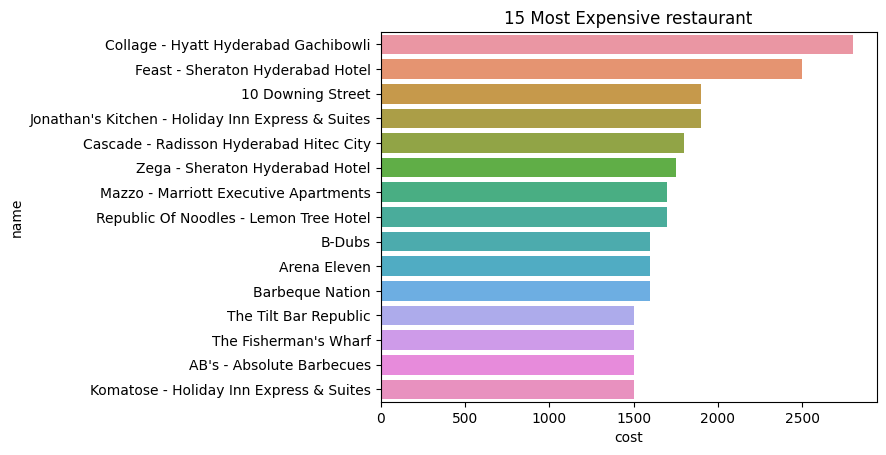

In [45]:
# checking for most expensive Restaurant
sns.barplot(x='cost',
            y="name",
            data=meta_df,
            order=meta_df.sort_values('cost',ascending=False).name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

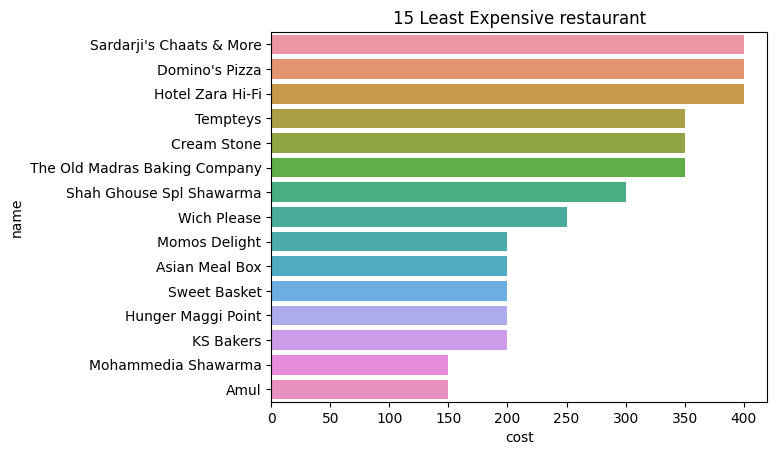

In [46]:
# checking for least expensive Restaurant
sns.barplot(x='cost',
            y="name",
            data=meta_df,
            order=meta_df.sort_values('cost',ascending=False).name[-15:])

plt.title('15 Least Expensive restaurant')
plt.show()

In [47]:
#  Creating sparse matrix for cuisine and joining it to meta_df

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

meta_df = meta_df.join(pd.DataFrame.sparse.from_spmatrix(

           mlb.fit_transform(meta_df.pop('cuisines')),
           index=meta_df.index, columns=mlb.classes_ )
                                                        )
meta_df.head()

,name,cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [48]:
# Most famous cuisine
meta_df.drop(['name','cost'],axis = 1).sum().sort_values(ascending=False)

NorthIndian      60
Chinese          43
Continental      21
Biryani          16
Asian            15
FastFood         15
Italian          14
Desserts         13
SouthIndian       8
Bakery            7
Mughlai           6
American          6
Cafe              6
Kebab             6
Mediterranean     5
Burger            5
Beverages         5
Andhra            5
Salad             5
Momos             4
European          4
Hyderabadi        4
Seafood           4
Sushi             4
Thai              3
StreetFood        2
ModernIndian      2
Japanese          2
IceCream          2
FingerFood        2
BBQ               2
Arabian           2
Mexican           1
Mithai            1
Malaysian         1
Lebanese          1
Juices            1
NorthEastern      1
Indonesian        1
Pizza             1
HealthyFood       1
Goan              1
Spanish           1
Wraps             1
dtype: int64

Text(0, 0.5, 'cuisines')

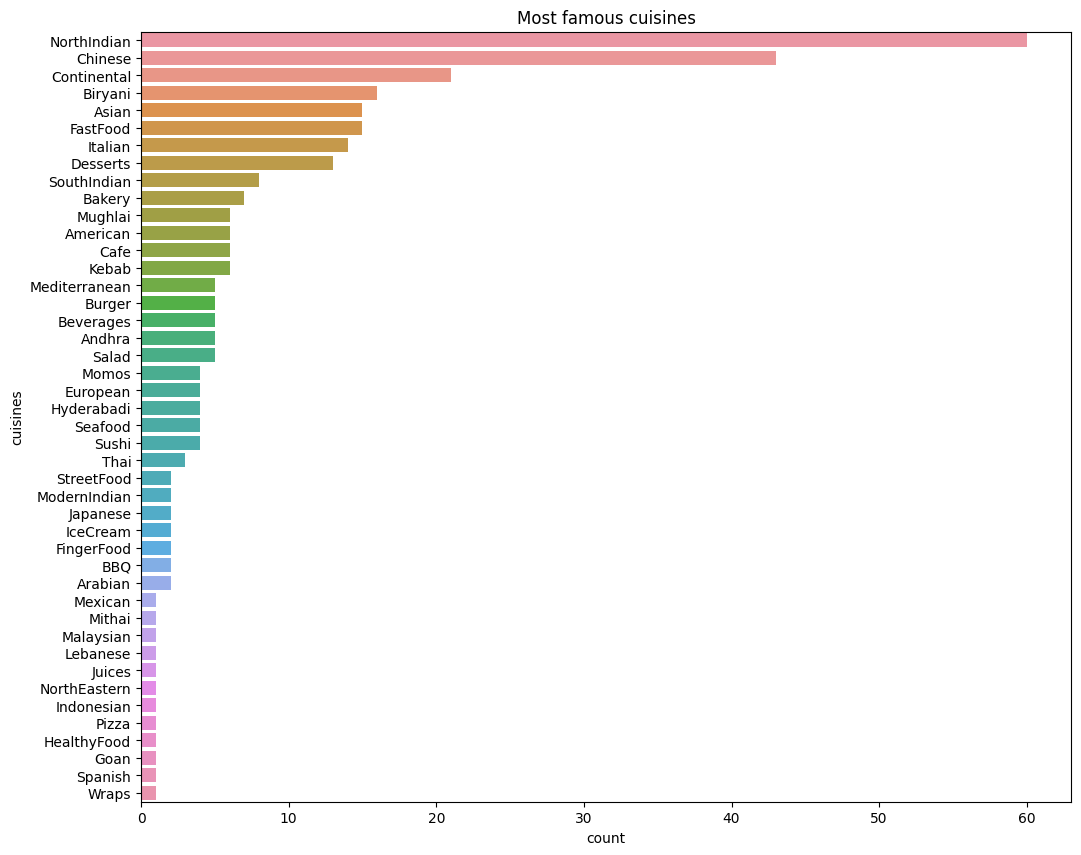

In [49]:
# Most famous cuisine
plt.figure(figsize = (12,10))
sns.barplot(y = meta_df.drop(['name','cost'],axis = 1).sum().sort_values(ascending=False).index,
            x = meta_df.drop(['name','cost'],axis = 1).sum().sort_values(ascending=False))
plt.title('Most famous cuisines')
plt.xlabel('count')
plt.ylabel('cuisines')

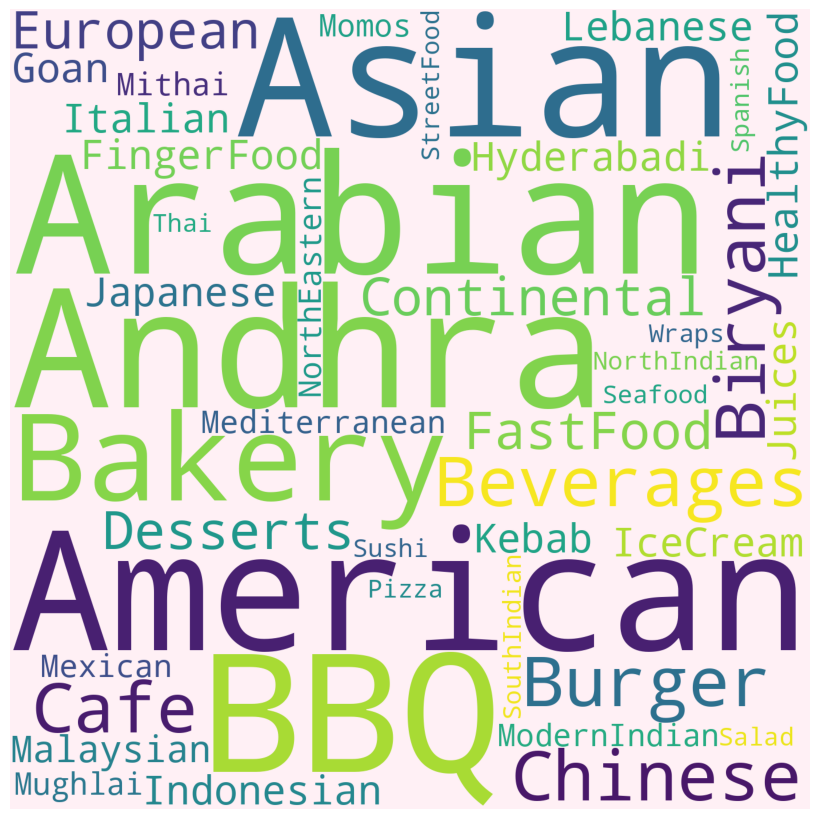

In [50]:
from wordcloud import WordCloud, STOPWORDS
words_list = meta_df.drop(['name','cost'],axis = 1).sum().keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '

wordcloud = WordCloud(width = 1400, height = 1400,
                background_color ='lavenderblush',
                min_font_size = 12).generate(strr)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Findings:

* Customers can choose between different restaurants based on their spending power.
* Most customers prefer North Indian and Chinese cuisines.

## **review_df**

In [51]:
review_df.head()

,restaurant,reviewer,review,rating,pictures,year,month,day,hour,review_number,followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0,2019,5,25,15,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0,2019,5,25,14,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0,2019,5,24,22,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0,2019,5,24,22,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0,2019,5,24,21,3,2.0


In [52]:
# Grouping restaurants according to their ratings
restaurant_ratings = review_df.groupby(['restaurant'])['rating'].mean().sort_values(ascending=False)
restaurant_ratings

restaurant
AB's - Absolute Barbecues         4.880
B-Dubs                            4.810
3B's - Buddies, Bar & Barbecue    4.760
Paradise                          4.700
Flechazo                          4.660
                                  ...  
Behrouz Biryani                   2.825
Mathura Vilas                     2.820
Pakwaan Grand                     2.710
Asian Meal Box                    2.580
Hotel Zara Hi-Fi                  2.400
Name: rating, Length: 100, dtype: float64

Text(0, 0.5, 'Ratings')

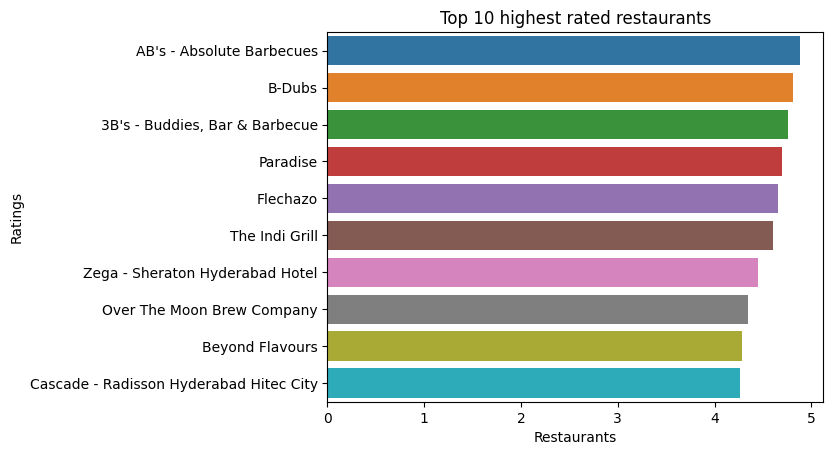

In [53]:
# Top 10 highest rated restaurant
sns.barplot(x = restaurant_ratings[:10], y = restaurant_ratings[:10].index)
plt.title('Top 10 highest rated restaurants')
plt.xlabel('Restaurants')
plt.ylabel('Ratings')

In [54]:
restaurant_ratings.describe()

count    100.000000
mean       3.601929
std        0.508102
min        2.400000
25%        3.245000
50%        3.615000
75%        3.846250
max        4.880000
Name: rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings')

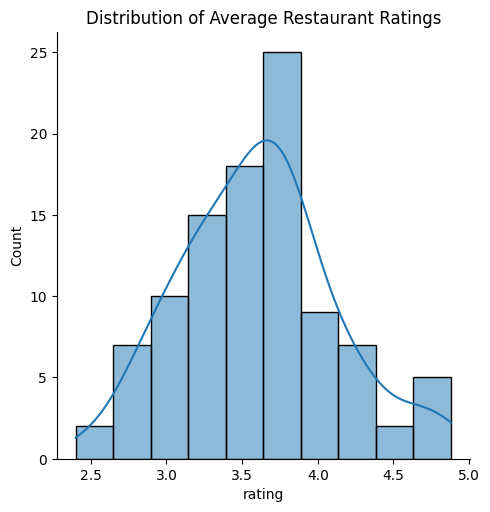

In [55]:
# Distribution of restaurants wrt ratings
sns.displot(x = restaurant_ratings, kde= True)
plt.title('Distribution of Average Restaurant Ratings')

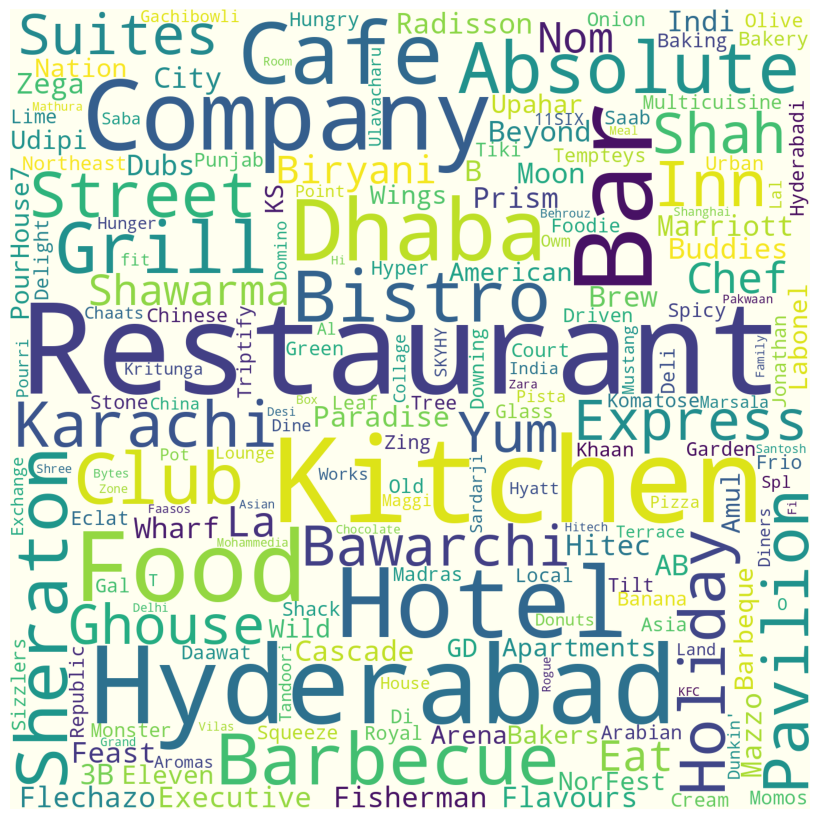

In [56]:
from wordcloud import WordCloud, STOPWORDS
words_list = restaurant_ratings.keys()
strr = ' '
for i in words_list:
    strr=strr+i+' '

wordcloud = WordCloud(width = 1400, height = 1400,
                background_color ='ivory',
                min_font_size = 12).generate(strr)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [57]:
# Top rated restaurants according to years
restaurant_yearly_ratings = review_df.groupby(['restaurant', 'year'])['rating'].mean().sort_values(ascending=False).reset_index()

In [58]:
# Top rated restaurants in 2019
twenty_nineteen = restaurant_yearly_ratings[restaurant_yearly_ratings.year == 2019].head(10)
twenty_nineteen

,restaurant,year,rating
0,AB's - Absolute Barbecues,2019,4.880000
1,B-Dubs,2019,4.810000
2,"3B's - Buddies, Bar & Barbecue",2019,4.760000
3,Paradise,2019,4.700000
4,Flechazo,2019,4.660000
5,Cascade - Radisson Hyderabad Hitec City,2019,4.641509
7,The Indi Grill,2019,4.600000
8,Karachi Bakery,2019,4.538462
10,Zega - Sheraton Hyderabad Hotel,2019,4.409091
12,Over The Moon Brew Company,2019,4.340000


Text(0, 0.5, 'Restaurants')

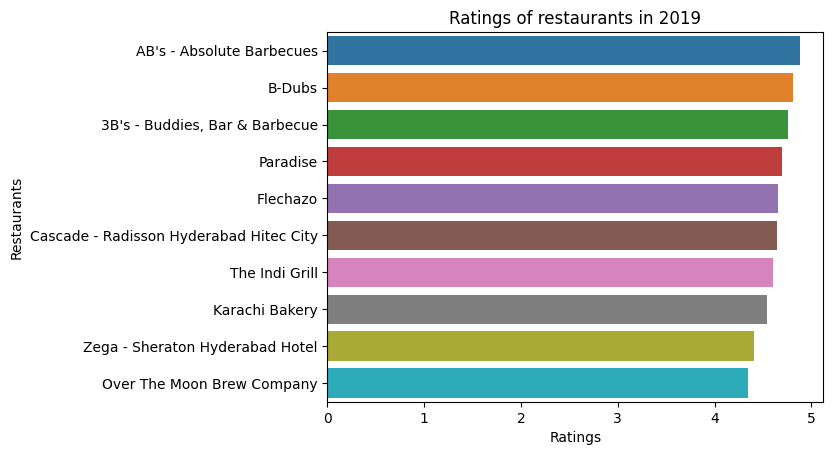

In [59]:
# Lets visualize
sns.barplot(x = twenty_nineteen.rating, y =twenty_nineteen.restaurant)
plt.title('Ratings of restaurants in 2019')
plt.xlabel('Ratings')
plt.ylabel('Restaurants')

In [60]:
# Top rated restaurants in 2018
twenty_eighteen = restaurant_yearly_ratings[restaurant_yearly_ratings.year == 2018].head(10)
twenty_eighteen

,restaurant,year,rating
6,Feast - Sheraton Hyderabad Hotel,2018,4.629630
9,Zega - Sheraton Hyderabad Hotel,2018,4.461538
11,Mazzo - Marriott Executive Apartments,2018,4.375000
14,Hyderabadi Daawat,2018,4.296296
21,Cascade - Radisson Hyderabad Hitec City,2018,4.211538
23,NorFest - The Dhaba,2018,4.166667
25,Barbeque Nation,2018,4.072464
27,Udipi's Upahar,2018,4.055556
31,American Wild Wings,2018,4.000000
32,Amul,2018,3.988095


Text(0, 0.5, 'Restaurants')

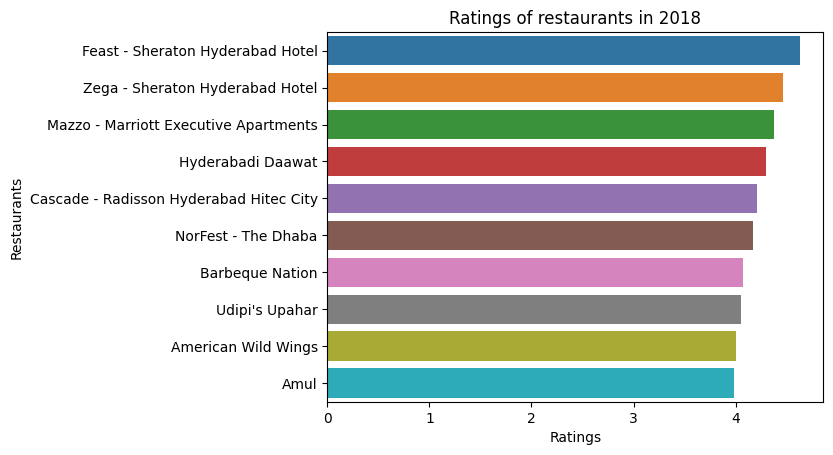

In [61]:
# Lets visualize
sns.barplot(x = twenty_eighteen.rating, y =twenty_eighteen.restaurant)
plt.title('Ratings of restaurants in 2018')
plt.xlabel('Ratings')
plt.ylabel('Restaurants')

In [62]:
twenty_nineteen_df = restaurant_yearly_ratings[restaurant_yearly_ratings.year == 2019]
twenty_eighteen_df = restaurant_yearly_ratings[restaurant_yearly_ratings.year == 2018]

In [63]:
# Restaurant's rating in both year 2018 and 2019

df = twenty_eighteen_df.merge(twenty_nineteen_df, how = 'inner', on = 'restaurant')
df.sort_values(by=['rating_x'], ascending=False, inplace=True)
df

,restaurant,year_x,rating_x,year_y,rating_y
0,Feast - Sheraton Hyderabad Hotel,2018,4.629630,2019,4.068493
1,Zega - Sheraton Hyderabad Hotel,2018,4.461538,2019,4.409091
2,Mazzo - Marriott Executive Apartments,2018,4.375000,2019,4.173913
3,Hyderabadi Daawat,2018,4.296296,2019,3.282609
4,Cascade - Radisson Hyderabad Hitec City,2018,4.211538,2019,4.641509
...,...,...,...,...,...
72,Behrouz Biryani,2018,2.886667,2019,2.640000
73,The Chocolate Room,2018,2.833333,2019,2.818182
74,Hotel Zara Hi-Fi,2018,2.767857,2019,1.931818
75,Asian Meal Box,2018,2.648148,2019,2.500000


It can seen from the table that ratings have decreased from 2018 to 2019 and new restaurants have taken place in position of old restaurant.



In [64]:
# Average rating in all years
review_df.groupby(['year'])['rating'].mean()

year
2016    3.965116
2017    3.805164
2018    3.521650
2019    3.668124
Name: rating, dtype: float64

In [65]:
# Number of restaurants in each year
review_df.groupby(['year'])['restaurant'].nunique()

year
2016      2
2017      8
2018     77
2019    100
Name: restaurant, dtype: int64

<Axes: xlabel='year', ylabel='restaurant'>

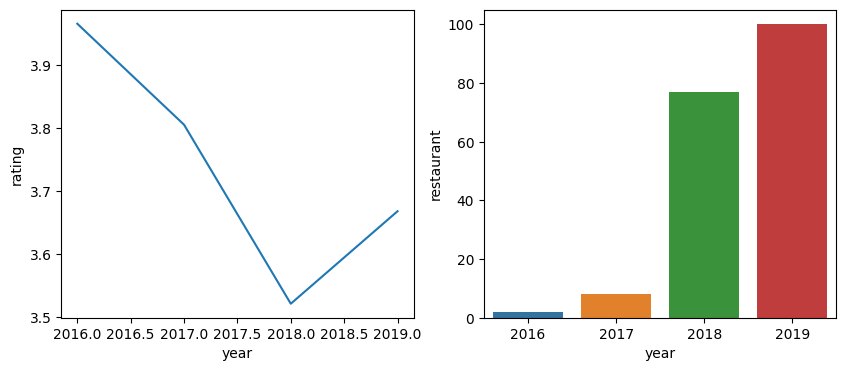

In [66]:
# Visualize
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = [10, 4])
sns.lineplot(y = review_df.groupby(['year'])['rating'].mean(), x = review_df.groupby(['year'])['rating'].mean().index, ax=ax1)
sns.barplot(y = review_df.groupby(['year'])['restaurant'].nunique(), x =review_df.groupby(['year'])['restaurant'].nunique().index, ax=ax2)


From the year 2016 to 2019, the ratings of the restaurants was decreasing but it showing some improvement in the year 2019. It can be mostly adjudged to the increasing number of restaurants being added to zomato. The increased rating in 2019, even with most number of restaurants suggests that the quality of service have been improved.



In [67]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = review_df.groupby(['reviewer','review_number','followers'])['rating'].mean().reset_index()
reviewers_df.sort_values(by=['review_number','followers','rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

In [68]:
#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head()


,reviewer,review_number,followers,rating
0,Anvesh Chowdary,1031,1654.0,3.333333
1,ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ,685,794.0,2.000000
2,Abc098,665,2275.0,3.000000
3,Mithun Ravindranathan,560,2863.0,4.000000
4,Mohd Zubair Ali (Hyderabad.Food.Diaries),482,1688.0,4.000000


Text(0.5, 1.0, 'Critics with most follower')

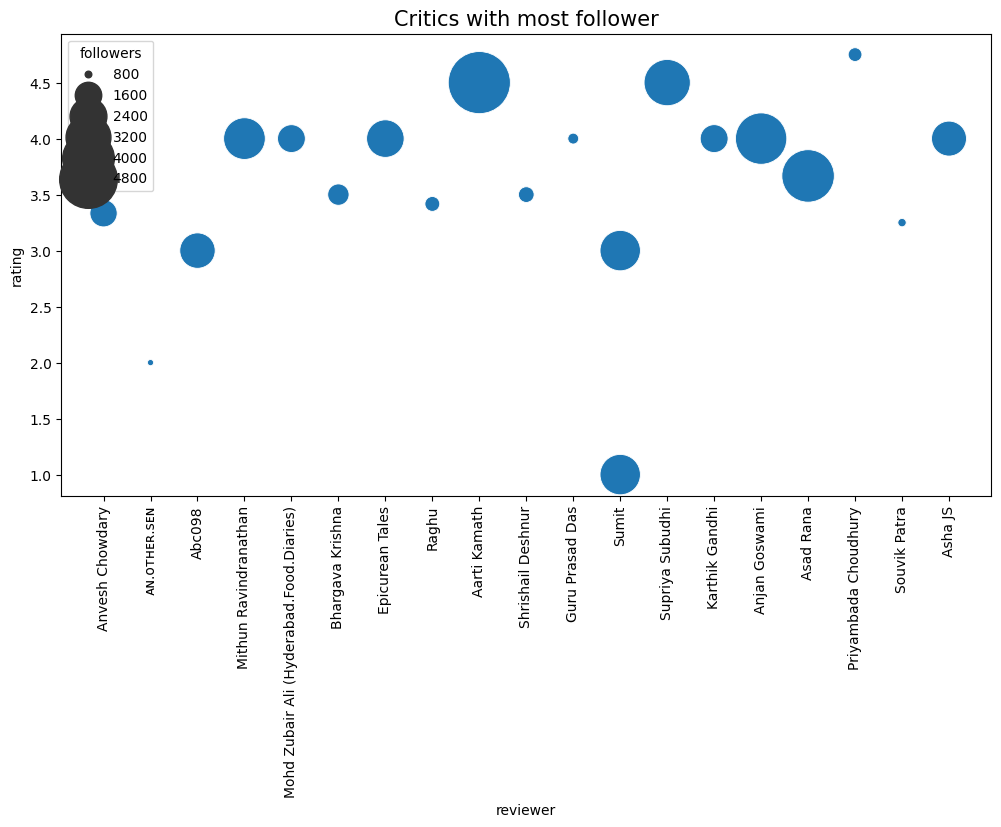

In [69]:
# Visualize
plt.figure(figsize=(12,6))
sns.scatterplot(data=reviewers_df[:20], x="reviewer", y="rating", size="followers",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Critics with most follower',size=15)

These are the most frequent reviewer with most number of followers. The restaurants can focus on these individuals to improve their image.



## **Merge both dataset**

In [70]:
meta_df.rename(columns={"name":"restaurant"}, inplace = True)

In [71]:
# merge both dataset

merge_df = review_df.merge(meta_df, how  = 'outer', on = 'restaurant')
merge_df.head()

,restaurant,reviewer,review,rating,pictures,year,month,day,hour,review_number,...,NorthIndian,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0.0,2019.0,5.0,25.0,15.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0.0,2019.0,5.0,25.0,14.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0.0,2019.0,5.0,24.0,22.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0.0,2019.0,5.0,24.0,22.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0.0,2019.0,5.0,24.0,21.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [72]:
merge_df.cost.fillna(merge_df.cost.mean(), inplace = True)

In [73]:
merge_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9960 entries, 0 to 9959
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype             
---  ------         --------------  -----             
 0   restaurant     9960 non-null   object            
 1   reviewer       9955 non-null   object            
 2   review         9955 non-null   object            
 3   rating         9955 non-null   float64           
 4   pictures       9955 non-null   float64           
 5   year           9955 non-null   float64           
 6   month          9955 non-null   float64           
 7   day            9955 non-null   float64           
 8   hour           9955 non-null   float64           
 9   review_number  9955 non-null   float64           
 10  followers      8381 non-null   float64           
 11  cost           9960 non-null   float64           
 12  American       9860 non-null   Sparse[float64, 0]
 13  Andhra         9860 non-null   Sparse[float64, 0]
 14  Arabian 

In [74]:
# merge meta_df with average restaurant ratings

meta_df = meta_df.merge(restaurant_ratings, how = 'inner', on = 'restaurant')

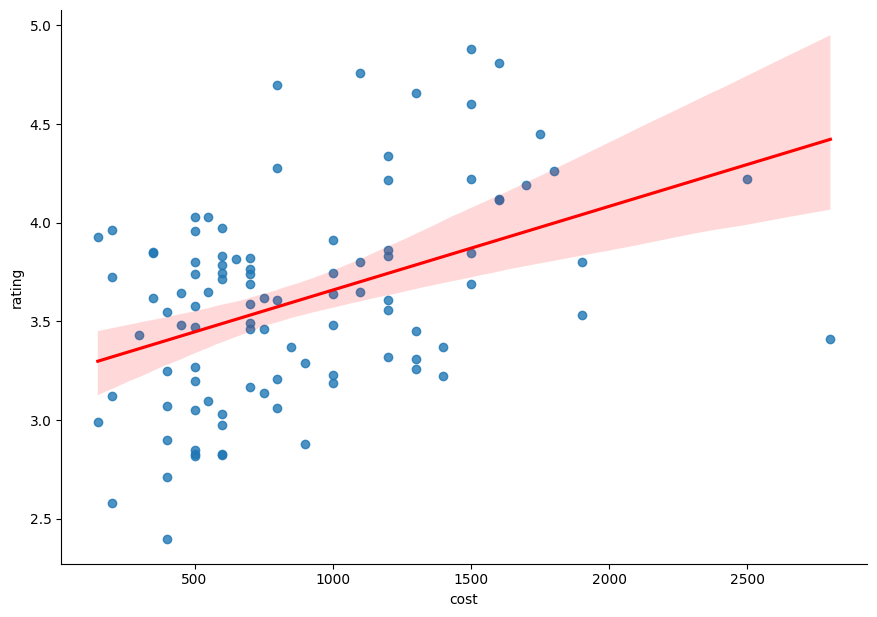

In [75]:
# Relation between cost and rating

sns.lmplot(y='rating',x='cost',data=meta_df,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

It is clearly visible that cost have positive have positive correlation with ratings.



In [76]:
# Restaurant with lowest ratings

low_rating = merge_df.groupby(['restaurant', 'cost'])['rating'].mean().sort_values(ascending=True)
low_rating = low_rating[low_rating != 0]
low_rating[:10]

restaurant                             cost 
Hotel Zara Hi-Fi                       400.0    2.400
Asian Meal Box                         200.0    2.580
Pakwaan Grand                          400.0    2.710
Mathura Vilas                          500.0    2.820
Behrouz Biryani                        600.0    2.825
Shree Santosh Dhaba Family Restaurant  500.0    2.830
The Chocolate Room                     600.0    2.830
KFC                                    500.0    2.850
Club Rogue                             900.0    2.880
Desi Bytes                             400.0    2.900
Name: rating, dtype: float64

Text(0.5, 1.0, 'Restaurants with Low Ratings')

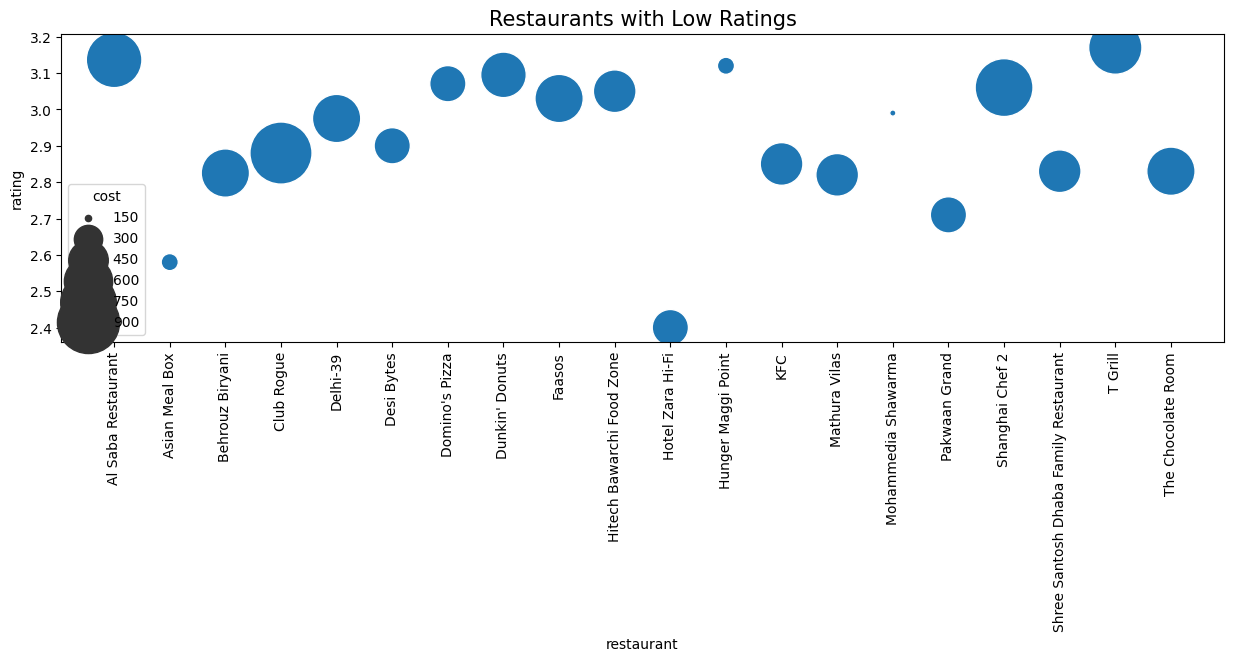

In [77]:
#visualizing the restaurants


plt.figure(figsize=(15,4))
sns.scatterplot(data=low_rating[:20], x="restaurant", y=low_rating, size="cost",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Restaurants with Low Ratings',size=15)

These restaurants are basically small food joints or restaurants with high prices according to the food they are serving. Efforts should be made to advertise more and analyze the reviews, especially for these restaurants, and work on them. Mohammedia Shawarma has good rating with the lowest cost. It seems it is doing well in its capacity.

In [78]:
# Compare ratings of Amul and Mohammedia Shawarma

print('Average rating of Amul')
print(round(merge_df[merge_df.restaurant == 'Amul']['rating'].mean(), 2))
print('Average rating of Mohammedia Shawarma')
print(merge_df[merge_df.restaurant == 'Mohammedia Shawarma']['rating'].mean())

Average rating of Amul
3.93
Average rating of Mohammedia Shawarma
2.99


Even though the cost of both Amul and Mohammedia Shawarma are similar, but the average rating of Amul is much higher than Mohammedia Shawarma which shows that Amul is doing much better in terms of customer service and satisfaction in very less cost than most other restaurants. It can be represented as a model restaurant for restaurants with poor rating to adopt the work culture of Amul’s.

## **Hypotheses Generation on visualized data for Clustering**

Clustering is done on the basis of similarities between the data points. The similarities are understood by how closely distanced these points are. The following are some hypotheses that can be generated by finding some similarities in the visualized data:

1. Restaurants with similar kinds of ratings can be clustered together. Ratings are done by people on the basis of food quality, service, packaging among other things.





2. Restaurants with high ratings would also probably be expensive and would be having a similar pricing strategy as well. They can be clustered according to the costs.



3. Restaurants having some of the most popular cuisines can be clustered together and restaurants with exotic cuisines such as Indonesian, Mexican, Japanese, etc can be clustered as they are really low in number



## **Modelling**

## **Feature scaling**

In [79]:
# Data scaling

from sklearn.preprocessing import MinMaxScaler

scaled_df = meta_df.copy()
scaler = MinMaxScaler()
scaled_df[['cost', 'rating']] = scaler.fit_transform(scaled_df[['cost', 'rating']])

In [80]:
meta_df.head()


,restaurant,cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,Pizza,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.70
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,3.21
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.34


## **KMeans Clustering on cost and ratings**

In [81]:
# Applying KMeans

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters=i)
  km.fit(scaled_df[['cost', 'rating']])
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

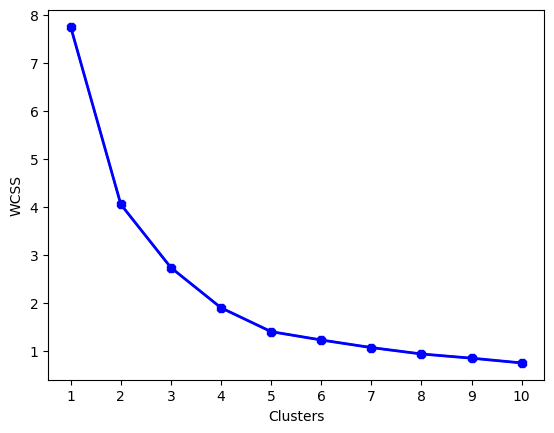

In [82]:
# Plotting the elbow curve

plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("Clusters")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

In [83]:
# Let's seee the silhouette score

from sklearn.metrics import silhouette_score
silhouette = []
for i in range(2,11):
    model= KMeans(n_clusters=i)
    preds= model.fit_predict(scaled_df[['cost', 'rating']])
    centers= model.cluster_centers_

    score = silhouette_score(scaled_df[['cost', 'rating']], preds, metric= 'euclidean')
    print('For cluster={}, the silhouette score is {}'.format(i,score))
    silhouette.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

For cluster=2, the silhouette score is 0.4681227734253803
For cluster=3, the silhouette score is 0.4008569988843416
For cluster=4, the silhouette score is 0.44668418433672674
For cluster=5, the silhouette score is 0.4645049754553133
For cluster=6, the silhouette score is 0.37901532696573387
For cluster=7, the silhouette score is 0.35213258953901755
For cluster=8, the silhouette score is 0.3541641578203648
For cluster=9, the silhouette score is 0.34605853193138675
For cluster=10, the silhouette score is 0.3411879979152157


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Silhouette score')

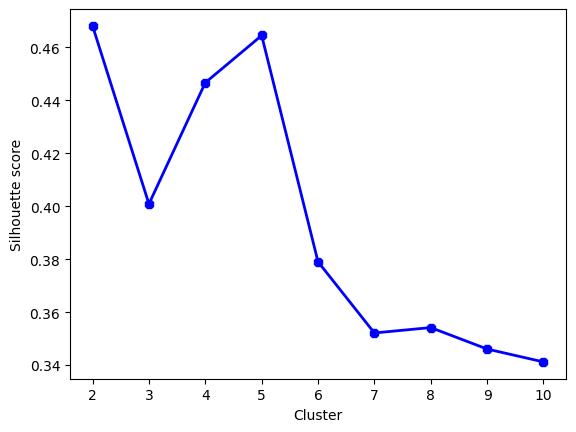

In [84]:
plt.plot(range(2, 11) , silhouette, linewidth=2, color="blue", marker ="8")
plt.xlabel('Cluster')
plt.ylabel('Silhouette score')

it's difficult to guess from elbow curve but silhouette score suggests the optimal number of clusters = 5. Even though cluster = 2 have the maximum silhouette score but will make the clustering too simple.

In [85]:
# Creating a new dataframe

data_with_clusters = scaled_df[['cost', 'rating']].copy()

In [86]:
# Kmeans using cluster = 5

km2 = KMeans(n_clusters = 5)
pred = km2.fit_predict(data_with_clusters)
data_with_clusters['labels'] = pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
data_with_clusters.head()


,cost,rating,labels
0,0.245283,0.758065,1
1,0.245283,0.927419,1
2,0.433962,0.911290,1
3,0.245283,0.326613,4
4,0.396226,0.782258,1


Text(0, 0.5, 'Rating')

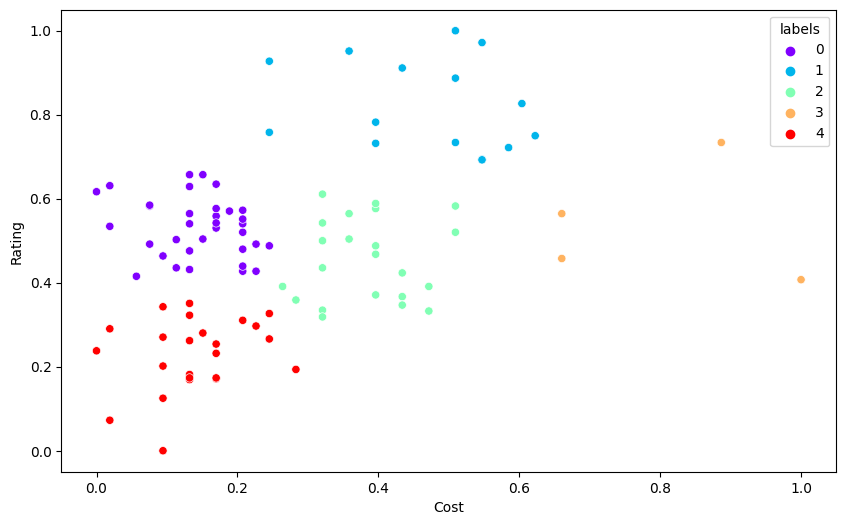

In [88]:
# Plot the clusters

plt.figure(figsize=[10, 6])
sns.scatterplot(x = data_with_clusters['cost'], y = data_with_clusters['rating'], hue = data_with_clusters['labels'], palette='rainbow', legend = 'full')
plt.xlabel('Cost')
plt.ylabel('Rating')

The clusters are pretty distinguishable from each other. Since the input variables were just two, it is easier to distinguish and interpret them.

* Class 1 represents restaurants with the lowest rating and with the lowest cost.

* Class 2 represents restaurants with the lowest rating and with the medium cost.

* Class 3 represents restaurants with the medium rating and with the medium cost.

* Class 0 represents restaurants with the medium rating and with the highest cost.

* Class 4 represents restaurants with the highest rating and with the highest cost.

Many data points will be overlapping each other as the number of features of quite large, so we will use PCA (Principal Component Analysis) and reduce to 3 features and then we can view the clusters in 3d projection.



In [89]:
scaled_df = scaled_df.set_index('restaurant')

In [90]:
#principal component analysis
from sklearn.decomposition import PCA

#choosing 3 components
pca = PCA(n_components=3)

#fitting pca
pca_result = pca.fit_transform(scaled_df)

#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))


Explained variation per principal component: [0.18699092 0.12274429 0.07138237]
Cumulative variance explained by 3 principal components: 38.11%


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


PCA 1 contains 18%, PCA 2 contains 12% and PC 3 contains 7% of the information. Thus, a total of 38% of the information is contained in the pca analysis.

In [91]:
# Dataframe to store PCA components

pca_df = pd.DataFrame(pca_result, columns = ['PC1', 'PC2', 'PC3'], index = meta_df.index)
pca_df.head()

,PC1,PC2,PC3
0,-0.865971,0.443741,-0.236328
1,-0.785799,-0.537356,0.102499
2,0.261207,0.417260,-0.330358
3,-0.781544,-0.735570,0.159528
4,-0.714331,0.780477,0.374780


In [92]:
#fit predict kmeans
pred_pca = km2.fit_predict(pca_result)
pca_df["labels"] = pred_pca

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'PC3')

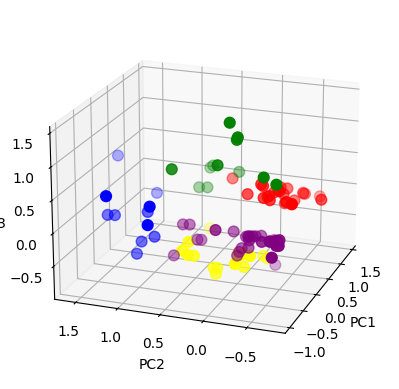

In [93]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.PC1[pca_df["labels"] == 0], pca_df.PC2[pca_df["labels"] == 0], pca_df.PC3[pca_df["labels"] == 0], c='purple', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"] == 1], pca_df.PC2[pca_df["labels"] == 1], pca_df.PC3[pca_df["labels"] == 1], c='red', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"] == 2], pca_df.PC2[pca_df["labels"] == 2], pca_df.PC3[pca_df["labels"] == 2], c='blue', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"] == 3], pca_df.PC2[pca_df["labels"] == 3], pca_df.PC3[pca_df["labels"] == 3], c='green', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"]== 4], pca_df.PC2[pca_df["labels"] == 4], pca_df.PC3[pca_df["labels"] == 4], c='yellow', s=60)
ax.scatter(pca_df.PC1[pca_df["labels"]== 5], pca_df.PC2[pca_df["labels"] == 5], pca_df.PC3[pca_df["labels"] == 5], c='black', s=60)
ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')

## **Some analysis on clusters**

In [94]:
# Let's join cluster labels to meta_df

cluster_df = meta_df.join(pca_df['labels'])
cluster_df.head()

,restaurant,cost,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,...,Salad,Seafood,SouthIndian,Spanish,StreetFood,Sushi,Thai,Wraps,rating,labels
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4.28,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.70,0
2,Flechazo,1300,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4.66,4
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,3.21,0
4,Over The Moon Brew Company,1200,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4.34,2


In [95]:
# Number of observations for each cluster

cluster_df.labels.value_counts()

0    32
1    26
4    18
3    12
2    11
Name: labels, dtype: int64

In [96]:
cluster_0 = cluster_df[cluster_df['labels'] == 0].reset_index()
cluster_1 = cluster_df[cluster_df['labels'] == 1].reset_index()
cluster_2 = cluster_df[cluster_df['labels'] == 2].reset_index()
cluster_3 = cluster_df[cluster_df['labels'] == 3].reset_index()
cluster_4 = cluster_df[cluster_df['labels'] == 4].reset_index()

In [97]:
list_of_cluster = [cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

In [98]:
# Avg Cost and Avg rating across each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Average Cost and Rating across cluster {i} \n',df[['cost','rating']].mean(),'\n')

Average Cost and Rating across cluster 0 
 cost      790.625000
rating      3.415038
dtype: float64 

Average Cost and Rating across cluster 1 
 cost      513.461538
rating      3.566693
dtype: float64 

Average Cost and Rating across cluster 2 
 cost      1618.181818
rating       4.000000
dtype: float64 

Average Cost and Rating across cluster 3 
 cost      1029.166667
rating       3.651887
dtype: float64 

Average Cost and Rating across cluster 4 
 cost      972.222222
rating      3.724167
dtype: float64 



In [99]:
#  Most Prominent cuisines in each cluster(Top 5)
for i,df in enumerate(list_of_cluster):
  print(f'Top Cuisines in Cluster {i}\n', df.drop(['restaurant','cost','rating','labels'],axis = 1).sum().sort_values(ascending=False)[:3],'\n')


Top Cuisines in Cluster 0
 index          1411
NorthIndian      32
Chinese          31
dtype: int64 

Top Cuisines in Cluster 1
 index       1451
Desserts      12
FastFood      10
dtype: int64 

Top Cuisines in Cluster 2
 index          540
Continental     10
NorthIndian      9
dtype: int64 

Top Cuisines in Cluster 3
 index      765
Chinese      7
Asian        6
dtype: int64 

Top Cuisines in Cluster 4
 index            684
NorthIndian       18
Mediterranean      4
dtype: int64 



Cluster 0 Observation:



* The restaurants in cluster 0 have most offered cuisines are North Indian and Chinese foods.
* The average rating is 3.41 and the average cost is 790 INR with maximum cost going upto 1000 INR and median cost of 700 INR. This means the cost in these restaurants are basically low in nature in this cluster beside one.


-------------------------------------------------------------------------------------------------------------------------------------

Cluster 1 Observation:

* The restaurants in cluster 1 have most offered cuisines are Deserts and Fast foods.
* The average rating is 3.56 and the average cost is 513 INR with maximum cost going upto 1600 INR and median cost of 500 INR. This means the cost in these restaurants are basically low in nature in this cluster beside one.
* Cluster 1 seems more attractive choice for customers as the average cost is less than cluster 0 and the average rating is higher than cluster 0.


----------------------------------------------------------------------------------------------------------------------------------

Cluster 2 Observation:





* The restaurants in cluster 2 have most offered cuisines are North Indian and Mediterranean foods.
* The average rating is 3.72 and the average cost is 972 INR with maximum cost going upto 1900 INR and median cost of 1000 INR. This means the cost in these restaurants are basically medium in nature in this cluster beside one.
* Cluster 2 has higher average rating and average cost than both cluster 0 and 1. So, customers who want to dine at a decent restaurant with decent price, this cluster have that restaurants.

---------------------------------------------------------------------------------------------------------------------------------------

Cluster 3 Observation:

* The restaurants in cluster 3 have most offered cuisines are Chinese and Asian foods.
* The average rating is 3.65 and the average cost is 1029 INR with maximum cost going upto 1700 INR and median cost of 1000 INR. This means the cost in these restaurants are basically medium in nature in this cluster beside one.
* Cluster 2 gives much better choice of restaurants than cluster 3 because the average rating and cost in cluster 3 is lower than cluster 2.

-------------------------------------------------------------------------------------------------------------------------------------

Cluster 4 Observation:

* The restaurants in cluster 3 have most offered cuisines are North Indian and Continental foods.
* The average rating is 4.0 and the average cost is 1618 INR with maximum cost going upto 2800 INR and median cost of 1500 INR. This means the cost in these restaurants are basically high in nature in this cluster beside one.
* Customers who can afford expensive restaurants and with good service, the restaurants in this cluster provide their choice.

## **Sentiment Analysis**

For sentiment analysis, we already have merged the two dataframe, but now we will only keep features necessary for sentiment analysis.

In [100]:
# Kepping features necessary for sentiment analysis

merge_df = merge_df[['restaurant', 'reviewer', 'review', 'rating', 'review_number', 'followers', 'pictures', 'cost']]
merge_df.head()

,restaurant,reviewer,review,rating,review_number,followers,pictures,cost
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,1.0,2.0,0.0,800.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,3.0,2.0,0.0,800.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2.0,3.0,0.0,800.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,1.0,1.0,0.0,800.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,3.0,2.0,0.0,800.0


<Axes: xlabel='rating', ylabel='count'>

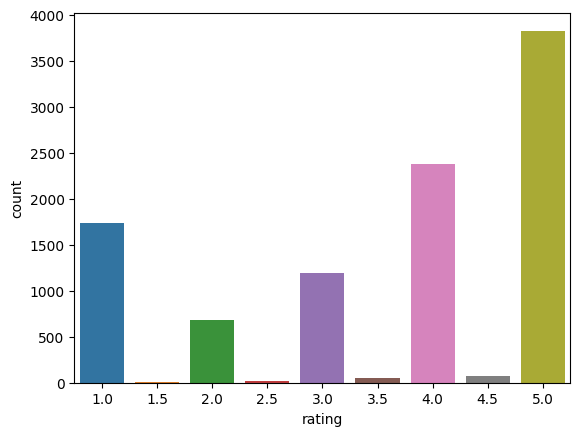

In [101]:
# overall rating count

sns.countplot(x = merge_df['rating'])

In [102]:
# pictures and rating relation

pic_ratings = merge_df.groupby('pictures')['rating'].mean().reset_index().sort_values(by='pictures')[:40]
pic_ratings.columns=['pictures','rating']

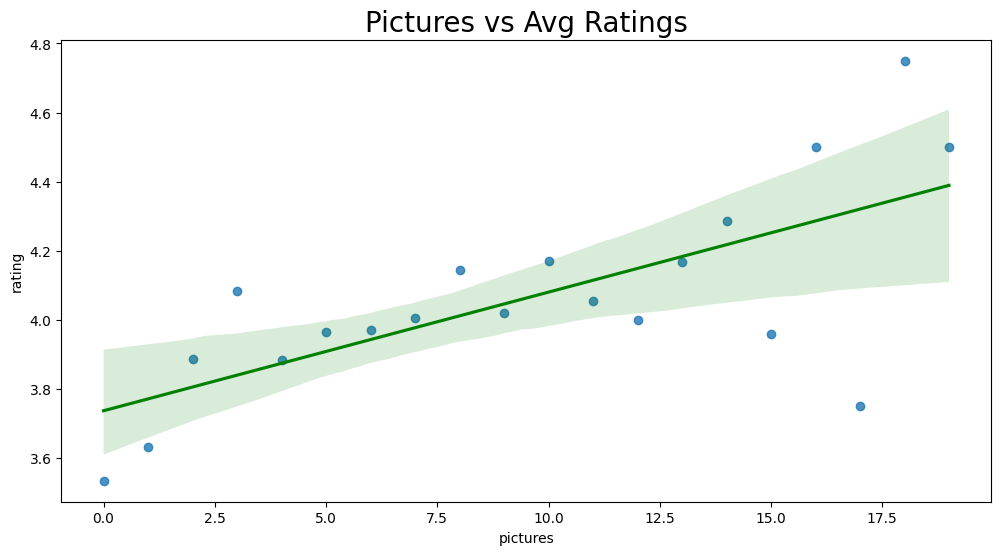

In [103]:
# Visualize

plt.figure(figsize=(12,6))
sns.regplot(data=pic_ratings[:20] , x='pictures', y='rating',line_kws={'color':'green'})
plt.title('Pictures vs Avg Ratings',fontdict={'size':20})
plt.show()

The more pictures reviewer posts, the chances of more to receive good rating from them.



In [104]:
#grouping reviewers with low rating and high reviews and followers

critics_df = merge_df.groupby(['reviewer','review_number','followers'])['rating'].mean().reset_index().sort_values(by=['rating','review_number','followers'],
            ascending=[True,False,False],ignore_index=True)
critics_df = critics_df[1:30]
critics_df.head()

,reviewer,review_number,followers,rating
1,D.S,195.0,2079.0,1.0
2,Ram Raju.,115.0,282.0,1.0
3,Farhaan Nasir (bankruptfoodie),107.0,503.0,1.0
4,Suyash Dhandhania,92.0,495.0,1.0
5,Avishek Banerjee,85.0,414.0,1.0


Text(0.5, 1.0, 'Critics with most number of reviews')

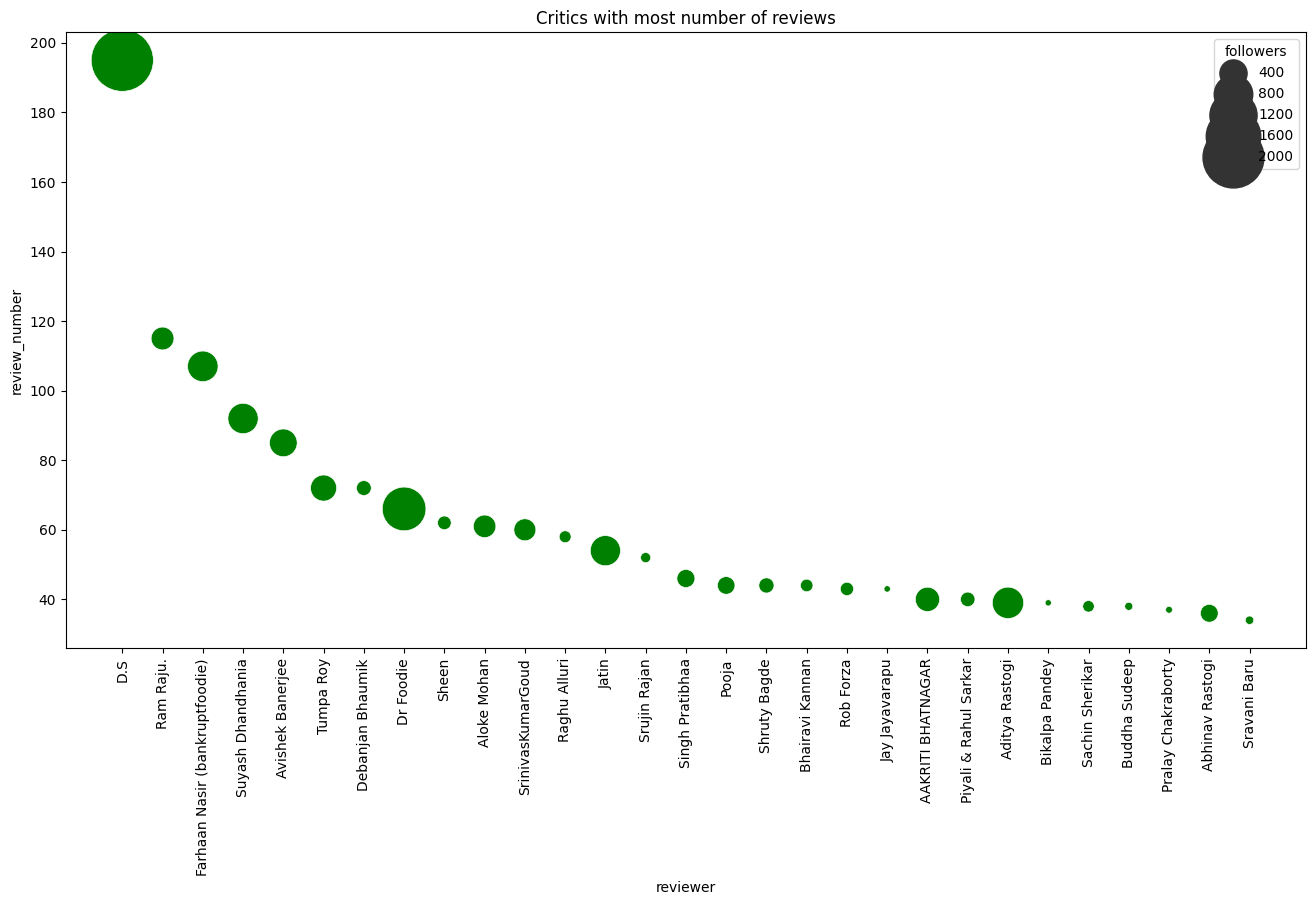

In [105]:
# Critics which are influencers and have high number of reviews

plt.figure(figsize=[16, 8])
sns.scatterplot(data = critics_df, x = 'reviewer', y = 'review_number', size = 'followers', alpha = 1, legend = True, color = 'green', sizes = (20, 2000))
plt.xticks(rotation = 90)
plt.title('Critics with most number of reviews')

The most experienced critics based on their number of reviews given in order Size represents their followers. Sumit and D.S has given most number of reviews and also has most followers. Thus, their reviews can have huge impact on restaurant's image.

## **Text pre-processing for reviews**

In [106]:
#importing stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [107]:
# extracting the stopwords from nltk library

stop_words = stopwords.words('english')

In [108]:
import string

#storing punctuation marks and digits
removable = string.punctuation

In [109]:
num = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [110]:
# Function for preprocessing on reviews
def reviews_processing(review):

    # removing all numeric value from reviews
    review = ' '.join(i for i in str(review).split() if i not in num)

    #converting the text to lowercase
    review = review.lower()

    #removing punctuation marks and digits
    dct = review.maketrans('','',removable)
    review = review.translate(dct)

    #removing stopwords from the review
    review = ' '.join(i for i in review.split() if i not in stop_words)
    return review

In [111]:
#applying reviews_processing to whole dataset
merge_df['review'] = merge_df['review'].apply(reviews_processing)

In [112]:
#assigning ratings into positive, neutral and negative sentiments for visualization

merge_df['sentiment'] = merge_df['rating'].apply(lambda rating : 1 if rating > 3.5 else (0 if 2 <= rating <= 3.5 else -1))

<Axes: ylabel='count'>

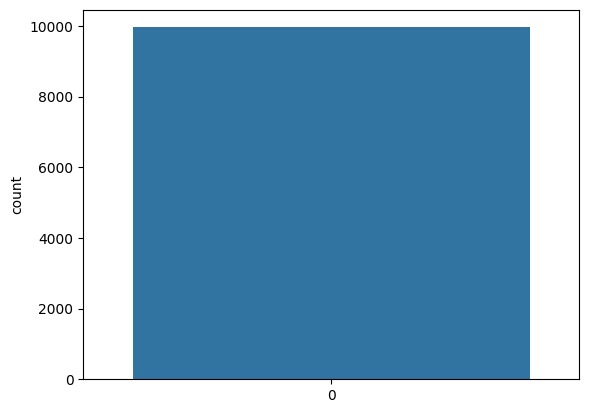

In [113]:
# Number of positive, negative and neutral reviews

sns.countplot(merge_df['sentiment'])


In [114]:
# seperating negative and positive reviews

positive_reviews = merge_df[merge_df['sentiment'] == 1]
negative_reviews = merge_df[merge_df['sentiment'] == -1]

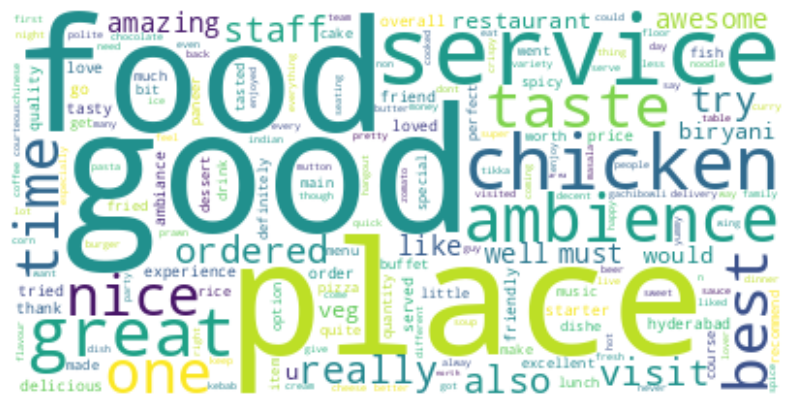

In [115]:
# Visualizing positive wordcloud

plt.figure(figsize = [10, 6])
pos_text = " ".join(review for review in positive_reviews.review)
pos_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stop_words).generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

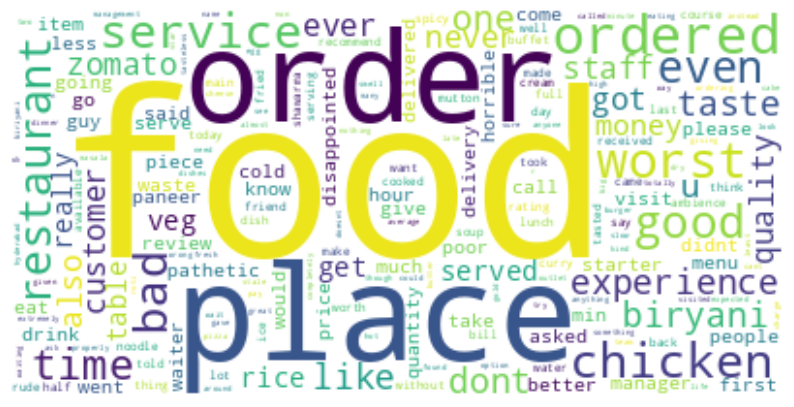

In [116]:
# Visualizing negative wordcloud

plt.figure(figsize = [10, 6])
pos_text = " ".join(review for review in negative_reviews.review)
pos_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stop_words).generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

* Phrases like good place, great taste, nice service suggests that people really like the restraurant service. Thus implying positive sentiment.
* Phrases like worst place, pathetic experience suggests that people didn't like the restaurant service and thus, implying negative sentiment.

Let's check which phrases are most used which suggests negative or positive sentiment.



In [117]:
# Frequently used words in positive, negative or neutral sentiment

from sklearn.feature_extraction.text import CountVectorizer

def most_used_words(sentiment,n):

    #positive sentiment = ratings with 4,5
    #negative sentiment = ratings with 1,2
    #neutral sentiment = ratings with 3
    sentiments = {1:[4,5,'Positive '],0:[3,3.5,'Neutral '],-1:[1,2.5,'Negative ']}
    df1 = merge_df[(merge_df['rating']>=sentiments[sentiment][0]) & (merge_df['rating']<=sentiments[sentiment][1])]

    #converts words into vectors based on count
    cv = CountVectorizer(ngram_range= (n,n))
    total_words = cv.fit_transform(df1['review'])

    #Will count the total number if occurances of each word in all reviews
    count = total_words.sum(axis = 0)

    #storing and sorting them in a list of tuples
    freq_df = pd.DataFrame((word, count[0, idx]) for word, idx in cv.vocabulary_.items())
    freq_df.columns=[sentiments[sentiment][2]+'Words','Frequency']
    freq_df = freq_df.sort_values(by='Frequency',ascending=False)

    return freq_df.reset_index().drop('index',axis=1)

In [118]:
# most used 3 word phrases in positive, negative and neutral sentiment

pos_df3 = most_used_words(1,3)
neu_df3 = most_used_words(0,3)
neg_df3 = most_used_words(-1,3)

Let's see few phrases from all sentiments



In [119]:
kd = pd.concat([neg_df3['Negative Words'][:15], pos_df3['Positive Words'][:15]],axis=1)
phr = pd.concat([kd, neu_df3['Neutral Words'][:15]],axis=1)
phr

,Negative Words,Positive Words,Neutral Words
0,worst experience ever,must visit place,veg non veg
1,ordered chicken biryani,place hangout friends,paneer butter masala
2,veg non veg,north indian food,starters main course
3,veg fried rice,veg non veg,overall good experience
4,starters main course,good place hangout,food good service
5,worst food ever,food really good,egg fried rice
6,went team lunch,overall good experience,yum yum tree
7,worst service ever,food good service,thai green curry
8,pan fried noodles,one best places,double ka meetha
9,overall bad experience,good food good,food 35 service


These phrases clearly describe the sentiments of the customers.



In [120]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

#applying stemmer
merge_df['review'] = merge_df['review'].apply(stemming)

## **Modelling**

In [121]:
# Applying train test split

X = merge_df['review']
y = merge_df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [122]:
# Applying tf-idf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Logisitc Regression

In [123]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced',random_state=42)
lr.fit(X_train_vec, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [124]:
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression")
print(lr_score)

Results for Logistic Regression
0.7796184738955824


In [125]:
# Prediction

y_pred_lr = lr.predict(X_test_vec)

In [126]:
# Evaluation metrics

from sklearn.metrics import *
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion matrix for Logistic Regression\n')
print(cm_lr)
print('\n')
print('Classification report')
print(classification_report(y_test,y_pred_lr))

Confusion matrix for Logistic Regression

[[ 274   64   12]
 [  84  215   89]
 [  30  160 1064]]


Classification report
              precision    recall  f1-score   support

          -1       0.71      0.78      0.74       350
           0       0.49      0.55      0.52       388
           1       0.91      0.85      0.88      1254

    accuracy                           0.78      1992
   macro avg       0.70      0.73      0.71      1992
weighted avg       0.79      0.78      0.79      1992



Logistic Regression doesn't provide good prediction score. It is doing well only on positive sentiment.



## **Random Forest**

In [127]:
# Applying random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [128]:
# Scoring

rf_score = rf.score(X_test_vec, y_test)
print("Results for Random Forest")
print(rf_score)

Results for Random Forest
0.7816265060240963


In [129]:
# Prediction

y_pred_rf = rf.predict(X_test_vec)

In [130]:
# Evaluation metrics
cm_rf = confusion_matrix(y_test, y_pred_rf)
print('confusion matrix for Random Forest\n')
print(cm_rf)
print('\n')
print('Classification report')
print(classification_report(y_test,y_pred_rf))

confusion matrix for Random Forest

[[ 253   32   65]
 [  60   77  251]
 [  11   16 1227]]


Classification report
              precision    recall  f1-score   support

          -1       0.78      0.72      0.75       350
           0       0.62      0.20      0.30       388
           1       0.80      0.98      0.88      1254

    accuracy                           0.78      1992
   macro avg       0.73      0.63      0.64      1992
weighted avg       0.76      0.78      0.74      1992



## **KNN**

In [131]:
# Applying KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_vec, y_train)

KNeighborsClassifier()

In [132]:
# Scoring

knn_score = knn.score(X_test_vec, y_test)
print("Results for Random Forest")
print(knn_score)

Results for Random Forest
0.642570281124498


In [133]:
# Prediction

y_pred_knn = knn.predict(X_test_vec)

In [134]:
# Evaluation metrics

cm_knn = confusion_matrix(y_test, y_pred_knn)
print('confusion matrix for KNN\n')
print(cm_knn)
print('\n')
print('Classification report')
print(classification_report(y_test,y_pred_knn))

confusion matrix for KNN

[[  29   14  307]
 [   9   15  364]
 [  10    8 1236]]


Classification report
              precision    recall  f1-score   support

          -1       0.60      0.08      0.15       350
           0       0.41      0.04      0.07       388
           1       0.65      0.99      0.78      1254

    accuracy                           0.64      1992
   macro avg       0.55      0.37      0.33      1992
weighted avg       0.59      0.64      0.53      1992



## **SVM**

In [135]:
#  Applying SVM

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_vec, y_train)

SVC()

In [136]:
# Scoring

svc_score = svc.score(X_test_vec, y_test)
print("Results for Random Forest")
print(svc_score)

Results for Random Forest
0.8097389558232931


In [137]:
# Prediction

y_pred_svc = svc.predict(X_test_vec)

In [138]:
# Evaluation metrics

cm_svc = confusion_matrix(y_test, y_pred_svc)
print('confusion matrix for SVM\n')
print(cm_svc)
print('\n')
print('Classification report')
print(classification_report(y_test,y_pred_svc))

confusion matrix for SVM

[[ 264   51   35]
 [  68  143  177]
 [  10   38 1206]]


Classification report
              precision    recall  f1-score   support

          -1       0.77      0.75      0.76       350
           0       0.62      0.37      0.46       388
           1       0.85      0.96      0.90      1254

    accuracy                           0.81      1992
   macro avg       0.75      0.69      0.71      1992
weighted avg       0.79      0.81      0.79      1992



In the business problem, predicting the negative sentiments correctly is really important but is more important for the models to reduce the number of false positives. False positives indicate that the reviews were actually negative but they were categorized as positive and this will lead to missing a complaint to work on.

Random Forest and SVM has given the least false positives, but SVM has performed significantly better than all other models. It has the least false positive and false negative for both negative and neutral statements. The accuracy is overall better than all other models. Thus, SVM is our go-to model for sentiment analysis.

## **Conclusion**

* The best restaurants are AB's - Absolute Barbecues, B-Dubs, and 3B's - Buddies, Bar & Barbecue.

* The most popular cuisines are the cuisines which most of the restaurants are willing to provide. The most popular cuisines are North Indian, Chinese, Continental, and Biryani.

* The restaurants in Hyderabadi have a flexible per person cost of 150 INR to 2800 INR. The cheapest is the food joint called Mohammedia Shawarma and Amul and the costliest restaurant is Collage - Hyatt Hyderabad Gachibowli.

* From the year 2016 to 2019, the ratings of the restaurants was decreasing but it showing some improvement in the year 2019. It can be mostly adjudged to the increasing number of restaurants being added to zomato. The increased rating in 2019, even with most number of restaurants suggests that the quality of service have been improved.

* Upon further analysis on low rating restaurants, it can be seen that some restaurants have high prices with very low ratings due to poor quality services. These restaurants should advertise more and work on their ratings. Even though the cost of both Amul and Mohammedia Shawarma are similar, but the average rating of Amul is much higher than Mohammedia Shawarma which shows that Amul is doing much better in terms of customer service and satisfaction in very less cost than most other restaurants. It can be represented as a model restaurant for restaurants with poor rating to adopt the work culture of Amul’s.

* Aarti Kamath, Supriya Subudhi and Anvesh Chowdhary are few reviewers with huge followings and gives mostly positive ratings. Whereas, Sumit, D.S and Ram Raju are few critics with huge followings and have been harsh on restaurant ratings. Thus, restaurants should give also focus on these individuals.

* Random Forest and SVM has given the least false positives, but SVM has performed significantly better than all other models. It has the least false positive and false negative for both negative and neutral statements. The accuracy is overall better than all other models. Thus, SVM is our go-to model for sentiment analysis.

## **Thank you**